#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Setup DeOldify

In [ ]:
#@title Run this cell to setup Deoldify
#@markdown * clones the project
#@markdown * installs deoldify
#@markdown * if available sets up the gpu
#@markdown * downloads system requirements
#@markdown * downloads pretrained models



#clone github and intall deoldify
!git clone https://github.com/jantic/DeOldify.git DeOldify 

%cd DeOldify

#setup
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

!pip install -r colab_requirements.txt

import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

#download the model
!mkdir 'models'
!wget https://www.dropbox.com/s/mwjep3vyqk5mkjc/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth
#download the watermark
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

colorizer = get_image_colorizer(artistic=False)

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

#◢ Colorize!!

In [ ]:
#@title ## Fill one of <u>source_url</u> or <u>path</u> field, then <b>Run</b> the cell
#@markdown ---
#@markdown Enter direct link url to image from web to source_url
source_url = '' #@param {type:"string"}
#@markdown ---
#@markdown Enter local path to image from colab to path
path = '' #@param {type:"string"}
#@markdown ---
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}


if (source_url == '' and path == ''):
  print("source_url as well as path are empty, fill one of them")
elif (source_url != '' and path != ''):
  print("source_url and path are both filled, fill only one of them")
elif source_url is not None and source_url !='':
  image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
  show_image_in_notebook(image_path)
else:
  image_path = colorizer.plot_transformed_image(path = path, render_factor=render_factor,compare=True, watermarked=watermarked)
  !mv $path '/content/DeOldify/test_images/image.png'
  show_image_in_notebook(image_path)


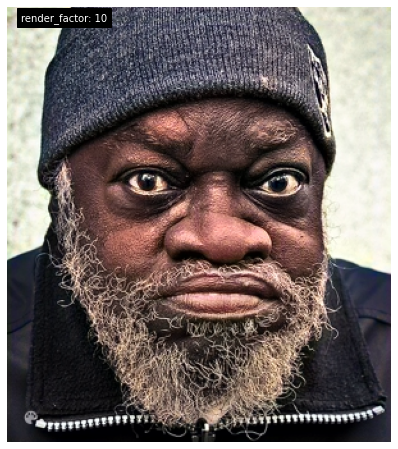

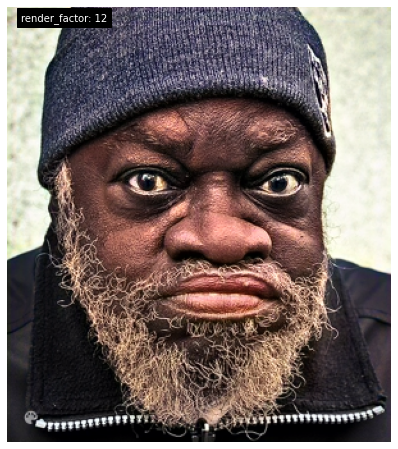

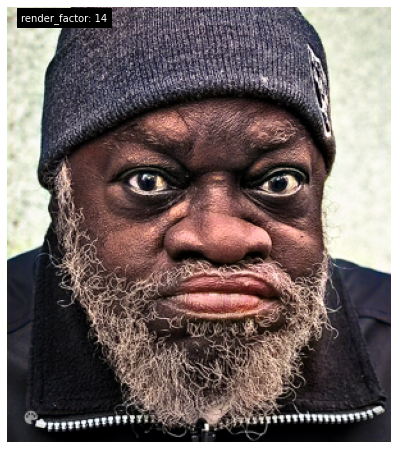

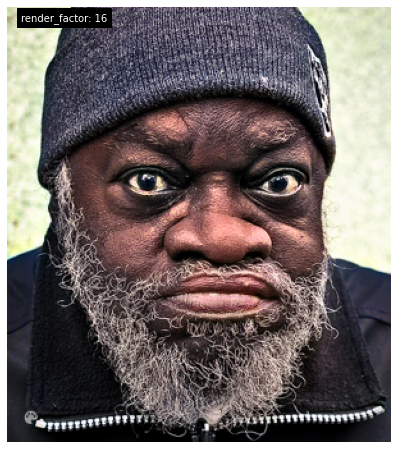

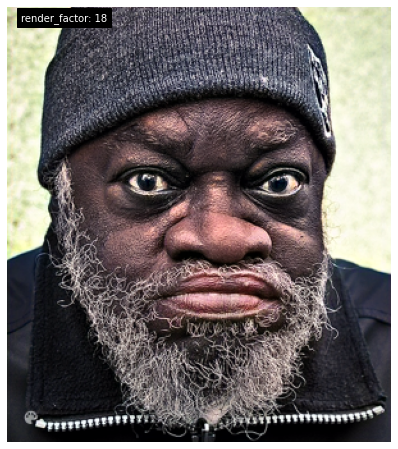

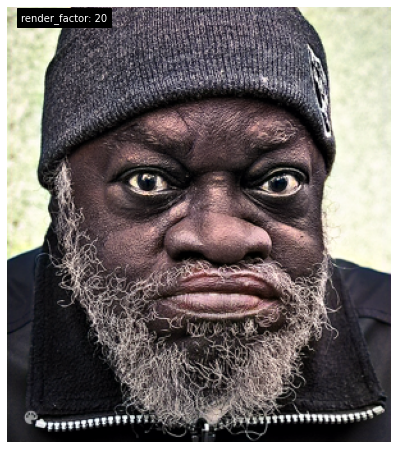

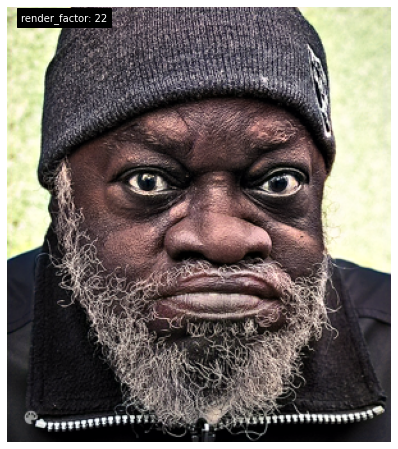

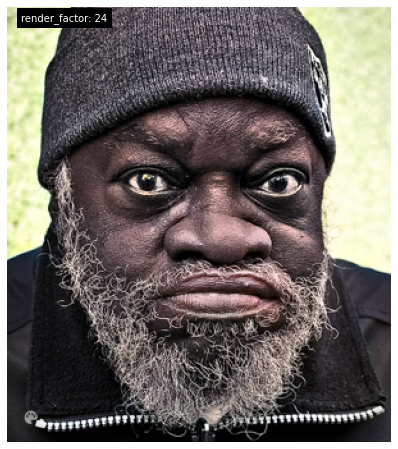

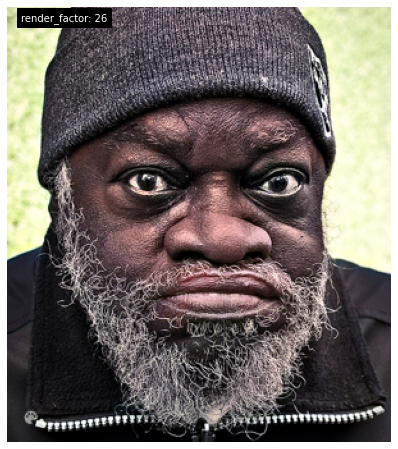

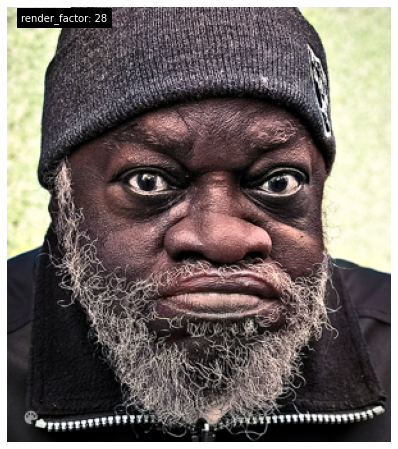

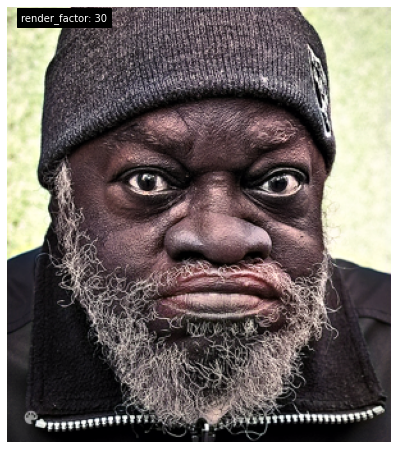

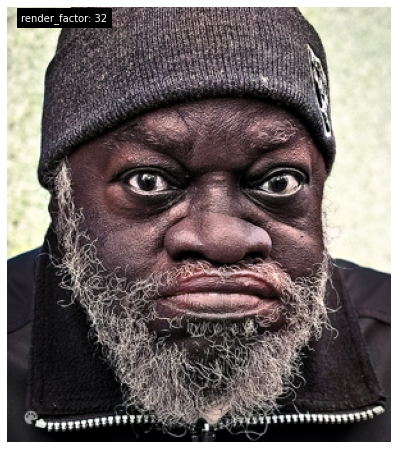

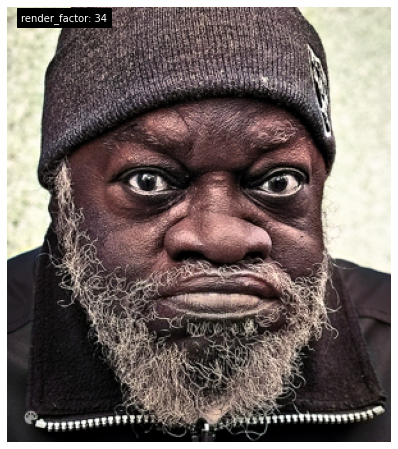

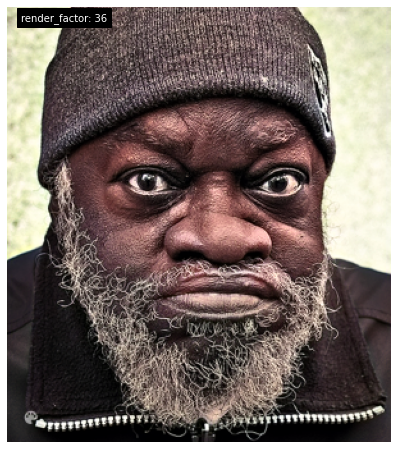

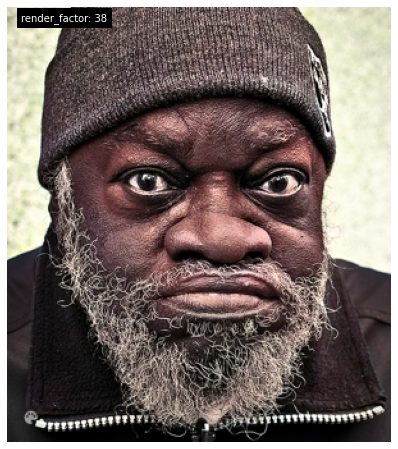

In [ ]:
#@title ## Run this cell to Expirement with <u>render_factor</u> values on image
#@markdown DeOldifies the images with all possible render_factor values and displays it

for i in range(10,40,2):
    colorizer.plot_transformed_image('/content/DeOldify/test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)